In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [15]:
data = pd.read_csv('data/dist.csv', delimiter=';').to_numpy()
X = data[:, :2]
y = data[:,2]

- Plotting the data

Text(0.5, 1.0, 'Initial data')

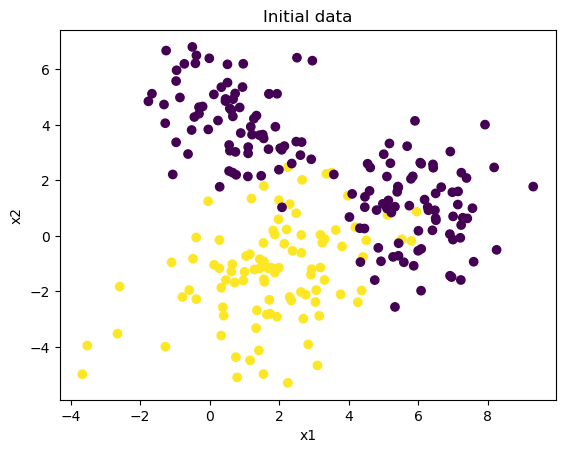

In [16]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial data')

1. Tune the necessary hyperparameters by for instance grid search. In this exercise we are concerned with
the hyperparameters given in Table 2. Every hyperparameter should be tested for at least 3 values
but you are free to add more testings. There is a desginated validation set that can be used for the
validation of the hyperparameters dist_val.csv

- Initiating kernels (Linear, rbf, poly)

In [17]:
linear_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])
rbf_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=10, C=50))
])
poly_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

kernels = [linear_kernel, rbf_kernel, poly_kernel]
for kernel in kernels:
    kernel.fit(X,y)
    print(kernel.score(X,y))


0.9036144578313253
0.9799196787148594
0.9437751004016064


1.1 working on grid search for linear kernel


In [18]:
clf = GridSearchCV(SVC(), {
    'kernel': ['linear'],
    'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100]
}, cv=5, return_train_score=False)
clf.fit(X, y)
df = pd.DataFrame(clf.cv_results_)
best_hyperparameters_linear = df[df['rank_test_score'] == 1]['params']
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001499,0.000448,0.000512,0.000652,1,linear,"{'C': 1, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
1,0.001506,0.000446,0.001100,0.000204,2,linear,"{'C': 2, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
2,0.001702,0.000398,0.000600,0.000490,3,linear,"{'C': 3, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
3,0.002004,0.000638,0.000902,0.000493,4,linear,"{'C': 4, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
4,0.002806,0.000933,0.000600,0.000490,5,linear,"{'C': 5, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
5,0.004710,0.000399,0.001821,0.000822,10,linear,"{'C': 10, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
6,0.006318,0.000814,0.001800,0.000400,20,linear,"{'C': 20, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
7,0.004909,0.002362,0.000799,0.000748,30,linear,"{'C': 30, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
8,0.004909,0.000492,0.000503,0.000636,40,linear,"{'C': 40, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1
9,0.006739,0.001453,0.000704,0.000399,50,linear,"{'C': 50, 'kernel': 'linear'}",0.88,0.92,0.86,0.92,0.857143,0.887429,0.027736,1


1.2 working on grid search for rbf kernel

In [19]:
clf = GridSearchCV(SVC(), {
    'kernel': ['rbf'],
    'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]
}, cv=5, return_train_score=False)
clf.fit(X, y)
df = pd.DataFrame(clf.cv_results_)
best_hyperparameters_rbf = df[df['rank_test_score'] == 1]['params']
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002111,0.000494,0.000714,0.000399,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.88,0.96,0.88,0.88,0.938776,0.907755,0.034649,19
1,0.001395,0.000481,0.000604,0.000493,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.90,1.00,0.88,0.90,0.897959,0.915592,0.042869,15
2,0.001728,0.000768,0.001146,0.000212,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.88,0.94,0.86,0.96,0.897959,0.907592,0.037191,23
3,0.002526,0.000616,0.001605,0.000492,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.86,0.96,0.82,0.90,0.857143,0.879429,0.047583,43
4,0.001803,0.000931,0.001202,0.000403,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,50
5,0.002608,0.000734,0.001207,0.000400,2,1,rbf,"{'C': 2, 'gamma': 1, 'kernel': 'rbf'}",0.88,0.96,0.86,0.88,0.938776,0.903755,0.038557,28
6,0.001203,0.000407,0.000904,0.000496,2,0.1,rbf,"{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}",0.88,1.00,0.88,0.88,0.897959,0.907592,0.046725,23
7,0.001619,0.000827,0.001304,0.000404,2,0.01,rbf,"{'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}",0.90,0.98,0.86,0.96,0.897959,0.919592,0.044011,5
8,0.002833,0.001525,0.001197,0.000748,2,0.001,rbf,"{'C': 2, 'gamma': 0.001, 'kernel': 'rbf'}",0.90,0.94,0.82,0.94,0.897959,0.899592,0.043825,29
9,0.003908,0.000197,0.003210,0.001295,2,0.0001,rbf,"{'C': 2, 'gamma': 0.0001, 'kernel': 'rbf'}",0.62,0.60,0.60,0.62,0.612245,0.610449,0.008989,49


1.3 working on grid search for poly kernel

In [20]:
clf = GridSearchCV(SVC(), {
    'kernel': ['poly'],
    'C': [1, 2, 3, 4, 5, 10, 20, 30],
    'degree' : [1, 2, 3, 4, 5, 6, 7, 8],
    'gamma' : [0.1, 0.01, 0.001]
}, cv=5, return_train_score=False)
clf.fit(X, y)
df = pd.DataFrame(clf.cv_results_)
best_hyperparameters_poly = df[df['rank_test_score'] == 1]['params']
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001306,0.000415,0.000405,0.000496,1,1,0.1,poly,"{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': ...",0.90,0.92,0.86,0.92,0.877551,0.895510,0.023678,4
1,0.000995,0.000039,0.000311,0.000408,1,1,0.01,poly,"{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel':...",0.90,0.92,0.86,0.92,0.836735,0.887347,0.033472,24
2,0.002102,0.000807,0.000800,0.000400,1,1,0.001,poly,"{'C': 1, 'degree': 1, 'gamma': 0.001, 'kernel'...",0.80,0.88,0.78,0.92,0.836735,0.843347,0.051293,50
3,0.002002,0.000891,0.001001,0.000001,1,2,0.1,poly,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': ...",0.74,0.82,0.84,0.84,0.816327,0.811265,0.036965,69
4,0.001312,0.000407,0.000915,0.000497,1,2,0.01,poly,"{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel':...",0.54,0.72,0.78,0.80,0.897959,0.747592,0.118544,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.001589,0.000483,0.000715,0.000621,30,7,0.01,poly,"{'C': 30, 'degree': 7, 'gamma': 0.01, 'kernel'...",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,105
188,0.001493,0.000436,0.000702,0.000603,30,7,0.001,poly,"{'C': 30, 'degree': 7, 'gamma': 0.001, 'kernel...",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,105
189,0.968933,0.785226,0.000896,0.000490,30,8,0.1,poly,"{'C': 30, 'degree': 8, 'gamma': 0.1, 'kernel':...",0.66,0.78,0.80,0.78,0.877551,0.779510,0.069735,80
190,0.001921,0.000629,0.000633,0.000518,30,8,0.01,poly,"{'C': 30, 'degree': 8, 'gamma': 0.01, 'kernel'...",0.60,0.60,0.60,0.60,0.612245,0.602449,0.004898,105


In [28]:
print(f"Best hyperparameters for linear kernel\n{best_hyperparameters_linear[0]} \n"
      "Note: Linear kernel produces the same results for all C values\n")
print(f"Best hyperparameters for rbf kernel\n{best_hyperparameters_rbf}\n")
print(f"Best hyperparameters for poly kernel\n{best_hyperparameters_poly}\n")

Best hyperparameters for linear kernel
{'C': 1, 'kernel': 'linear'} 
Note: Linear kernel produces the same results for all C values

Best hyperparameters for rbf kernel
42    {'C': 40, 'gamma': 0.01, 'kernel': 'rbf'}
Name: params, dtype: object

Best hyperparameters for poly kernel
180    {'C': 30, 'degree': 5, 'gamma': 0.1, 'kernel':...
Name: params, dtype: object



Initiating kernels (Linear, rbf, poly) with the hyperparameters found in the grid search

In [47]:
linear_kernel = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])
rbf_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.01, C=40))
])
poly_kernel = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", gamma=0.1, degree=5, C=30))
])

val_data=  pd.read_csv('data/dist_val.csv', delimiter=';').to_numpy()
X_val = val_data[:, :2]
y_val = val_data[:,2]

kernels = [linear_kernel, rbf_kernel, poly_kernel]
for kernel in kernels:
    kernel.fit(X,y)
    print(kernel.score(X_val,y_val))

0.8826941347067353
0.8995949797489875
0.5613780689034452
